In [1]:
# Cell 1: Import Libraries and Load Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")

df = pd.read_csv('/kaggle/input/netflix-data/Netflix Dataset.csv')

print("Netflix Dataset Overview")
print("=" * 50)
print(f"Shape: {df.shape}")
print(f"Records: {df.shape[0]:,}")
print(f"Features: {df.shape[1]}")

print("\nFirst 5 rows:")
print(df.head())

Netflix Dataset Overview
Shape: (7789, 11)
Records: 7,789
Features: 11

First 5 rows:
  Show_Id Category  Title           Director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

        Release_Date Rating   Duration  \
0    August 14, 2020  TV-MA  4 Seasons   
1  December 23, 2016  TV-MA     93 min   
2  December 20, 2018      R     78 min   
3  November 16, 2017  PG-13   

**Dataset Information and Structure**

In [2]:
print("Dataset Info:")
print("=" * 30)
df.info()

print("\nMissing Values:")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

print("\nUnique Values per Column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique():,}")

print("\nData Types:")
print(df.dtypes)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB

Missing Values:
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
dtype: int64

Unique Values per Column:
Show_Id: 7,787
Category: 2
Title: 7,787
Director: 4,050
Cast: 6,831
Country: 681
Release_Date: 1,565
Rating: 14
Duration: 216
Ty

**Q1 - House of Cards Show ID and Director**

In [3]:
print("Question 1: House of Cards Show ID and Director")
print("=" * 50)

house_of_cards = df[df['Title'].str.contains('House of Cards', case=False, na=False)]

if not house_of_cards.empty:
    for _, row in house_of_cards.iterrows():
        print(f"Show ID: {row['Show_Id']}")
        print(f"Title: {row['Title']}")
        print(f"Director: {row['Director']}")
        print(f"Category: {row['Category']}")
        print("-" * 30)
else:
    print("House of Cards not found in dataset")

Question 1: House of Cards Show ID and Director
Show ID: s2833
Title: House of Cards
Director: Robin Wright, David Fincher, Gerald McRaney, John David Coles, David Manson
Category: TV Show
------------------------------


**Q2 - Year with Highest Releases**

Question 2: Year with Highest Number of Releases
Top 10 Years with Most Releases:
Release_Year
2019.0    2137
2020.0    2009
2018.0    1661
2017.0    1201
2016.0     432
2021.0     117
2015.0      79
2014.0      24
2011.0      13
2013.0      10
dtype: int64

Highest release year: 2019.0 with 2137 releases


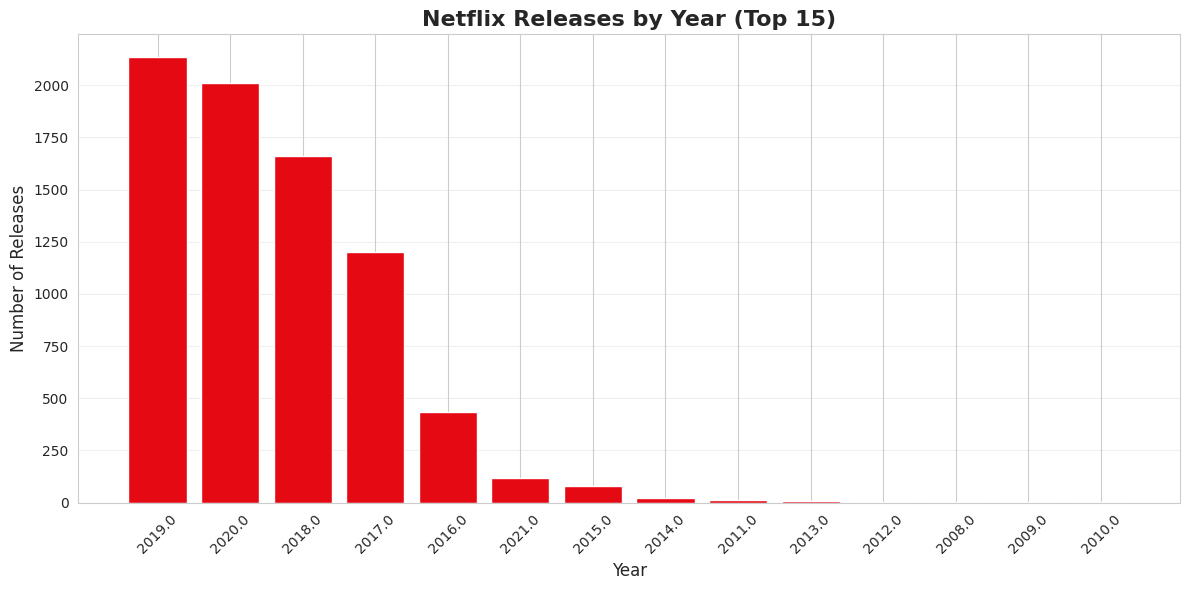

In [4]:
print("Question 2: Year with Highest Number of Releases")
print("=" * 50)

# Extract year from Release_Date
df['Release_Year'] = pd.to_datetime(df['Release_Date'], errors='coerce').dt.year

# Count releases by year
yearly_releases = df.groupby('Release_Year').size().sort_values(ascending=False)

print(f"Top 10 Years with Most Releases:")
print(yearly_releases.head(10))

print(f"\nHighest release year: {yearly_releases.index[0]} with {yearly_releases.iloc[0]} releases")

# Bar chart
plt.figure(figsize=(12, 6))
top_years = yearly_releases.head(15)
plt.bar(top_years.index.astype(str), top_years.values, color='#E50914')
plt.title('Netflix Releases by Year (Top 15)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Releases', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

**Q3 - Movies vs TV Shows Count**

Question 3: Movies vs TV Shows Distribution
Content Distribution:
Category
Movie      5379
TV Show    2410
Name: count, dtype: int64

Total Movies: 5,379
Total TV Shows: 2,410
Movie percentage: 69.1%
TV Show percentage: 30.9%


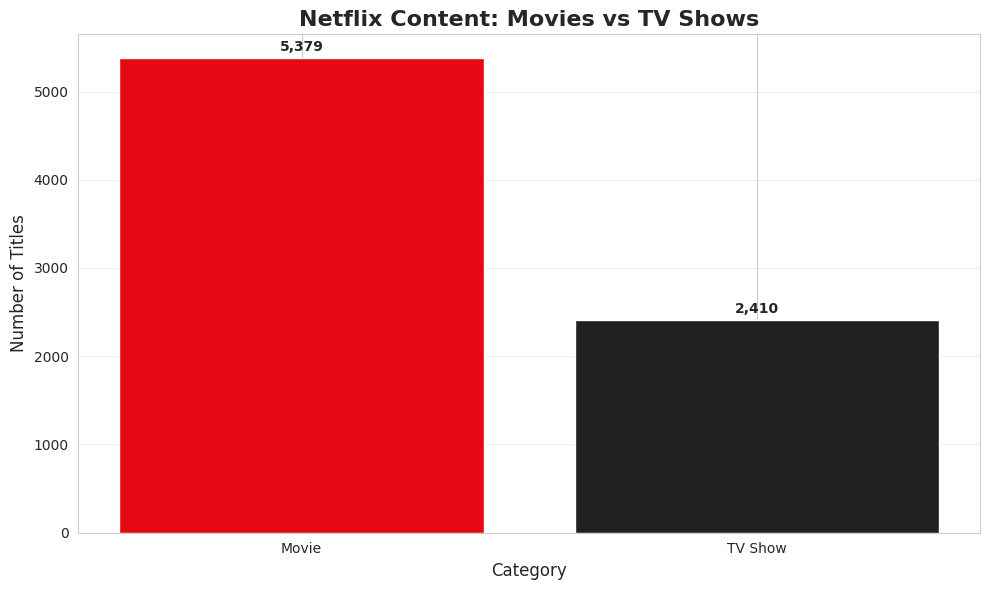

In [5]:
print("Question 3: Movies vs TV Shows Distribution")
print("=" * 50)

category_counts = df['Category'].value_counts()
print("Content Distribution:")
print(category_counts)

print(f"\nTotal Movies: {category_counts['Movie']:,}")
print(f"Total TV Shows: {category_counts['TV Show']:,}")
print(f"Movie percentage: {category_counts['Movie']/len(df)*100:.1f}%")
print(f"TV Show percentage: {category_counts['TV Show']/len(df)*100:.1f}%")

# Bar chart
plt.figure(figsize=(10, 6))
colors = ['#E50914', '#221F1F']
bars = plt.bar(category_counts.index, category_counts.values, color=colors)
plt.title('Netflix Content: Movies vs TV Shows', fontsize=16, fontweight='bold')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 50,
             f'{height:,}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

**Q4 - Movies Released in Year 2000**

In [6]:
print("Question 4: Movies Released in Year 2000")
print("=" * 50)

movies_2000 = df[(df['Category'] == 'Movie') & (df['Release_Year'] == 2000)]

print(f"Total movies released in 2000: {len(movies_2000)}")
print("\nMovies released in 2000:")
print("-" * 30)

if not movies_2000.empty:
    for _, movie in movies_2000.iterrows():
        print(f"Title: {movie['Title']}")
        print(f"Director: {movie['Director']}")
        print(f"Country: {movie['Country']}")
        print(f"Duration: {movie['Duration']}")
        print("-" * 30)
else:
    print("No movies found for year 2000")

Question 4: Movies Released in Year 2000
Total movies released in 2000: 0

Movies released in 2000:
------------------------------
No movies found for year 2000


**Q5 - TV Shows Released Only in India**

In [7]:
print("Question 5: TV Shows Released Only in India")
print("=" * 50)

india_tv_shows = df[(df['Category'] == 'TV Show') & 
                   (df['Country'].str.contains('India', case=False, na=False)) &
                   (~df['Country'].str.contains(',', na=False))]

print(f"Total TV Shows released only in India: {len(india_tv_shows)}")
print("\nTV Show Titles:")
print("-" * 30)

if not india_tv_shows.empty:
    for i, show in enumerate(india_tv_shows['Title'], 1):
        print(f"{i}. {show}")
else:
    print("No TV shows found that were released only in India")

Question 5: TV Shows Released Only in India
Total TV Shows released only in India: 71

TV Show Titles:
------------------------------
1. 21 Sarfarosh: Saragarhi 1897
2. 7 (Seven)
3. Agent Raghav
4. Akbar Birbal
5. Anjaan: Rural Myths
6. Anjaan: Special Crimes Unit
7. Bad Boy Billionaires: India
8. Badalte Rishton Ki Dastaan
9. Bard of Blood
10. Betaal
11. Bh Se Bhade
12. Bhaag Beanie Bhaag
13. Bhaage Re Mann
14. Chhota Bheem
15. ChuChu TV Nursery Rhymes & Kids Songs (Hindi)
16. Classic Legends
17. College Romance
18. Cricket Fever: Mumbai Indians
19. Darr Sabko Lagta Hai
20. Delhi Crime
21. Devlok with Devdutt Pattanaik
22. Dharmakshetra
23. Engineering Girls
24. Fabulous Lives of Bollywood Wives
25. Fear Files... Har Mod Pe Darr
26. Gabru: Hip Hop Revolution
27. Gangs of Hassepur
28. GHOUL
29. Girls Hostel
30. Hasmukh
31. Inmates
32. Jamtara - Sabka Number Ayega
33. Jhansi Ki Rani
34. Khan: No. 1 Crime Hunter
35. Khelti Hai Zindagi Aankh Micholi
36. Khotey Sikkey
37. Ladies Up
38. Lei

**Q6 - Top 10 Directors**

Question 6: Top 10 Directors with Most Content
Top 10 Directors:
------------------------------
1. Jan Suter: 21 titles
2. Raúl Campos: 19 titles
3. Marcus Raboy: 16 titles
4. Jay Karas: 15 titles
5. Cathy Garcia-Molina: 13 titles
6. Martin Scorsese: 12 titles
7. Youssef Chahine: 12 titles
8. Jay Chapman: 12 titles
9. Steven Spielberg: 10 titles
10. David Dhawan: 9 titles


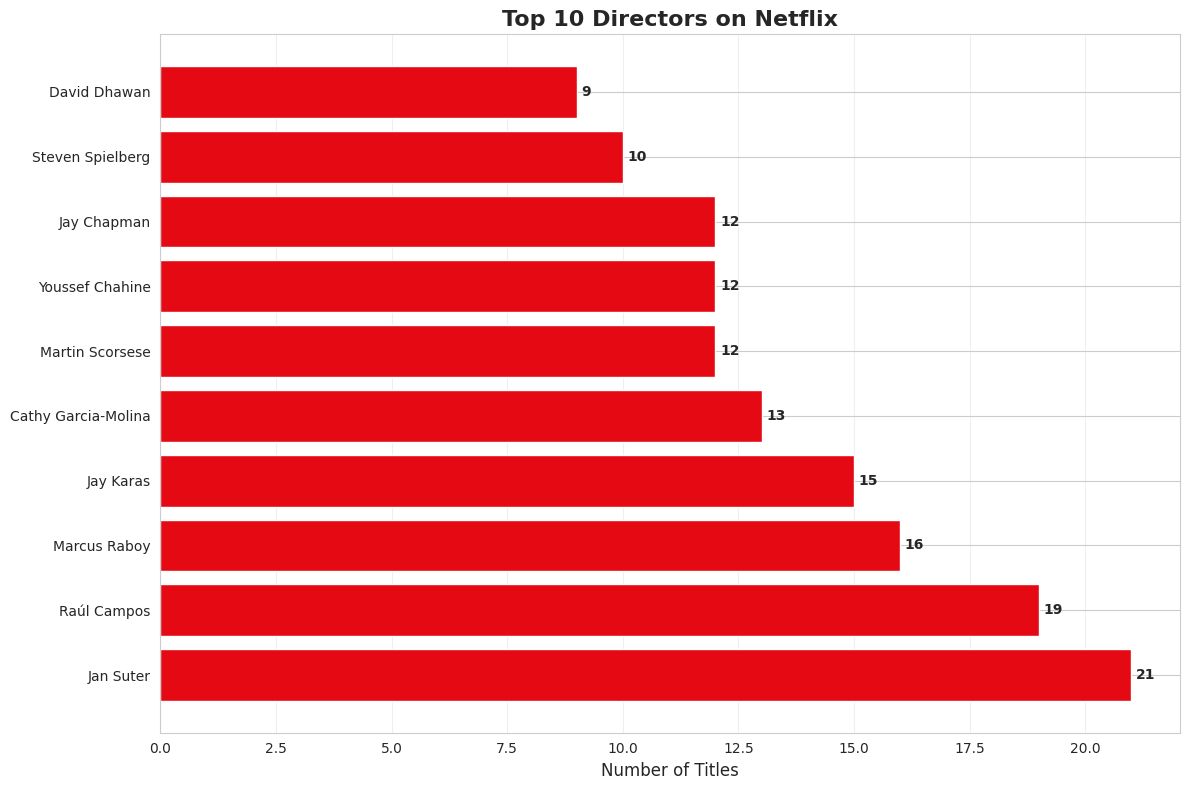

In [8]:
print("Question 6: Top 10 Directors with Most Content")
print("=" * 50)

# Split directors (some entries have multiple directors)
all_directors = []
for directors in df['Director'].dropna():
    if ',' in str(directors):
        all_directors.extend([d.strip() for d in str(directors).split(',')])
    else:
        all_directors.append(str(directors).strip())

director_counts = pd.Series(all_directors).value_counts()
top_10_directors = director_counts.head(10)

print("Top 10 Directors:")
print("-" * 30)
for i, (director, count) in enumerate(top_10_directors.items(), 1):
    print(f"{i}. {director}: {count} titles")

# Bar chart
plt.figure(figsize=(12, 8))
plt.barh(range(len(top_10_directors)), top_10_directors.values, color='#E50914')
plt.yticks(range(len(top_10_directors)), top_10_directors.index)
plt.xlabel('Number of Titles', fontsize=12)
plt.title('Top 10 Directors on Netflix', fontsize=16, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(top_10_directors.values):
    plt.text(v + 0.1, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.show()

**Q7 - Movies with Comedies OR Country is United Kingdom**

Question 7: Movies with Comedies OR Country is United Kingdom
Total records matching criteria: 2110

Breakdown:
Movies with Comedies: 1472
Content from United Kingdom: 723

First 10 matching records:
--------------------------------------------------
1. 15-Aug (Movie) - India
   Type: Comedies, Dramas, Independent Movies

2. '89 (Movie) - United Kingdom
   Type: Sports Movies

3. #realityhigh (Movie) - United States
   Type: Comedies

4. #Roxy (Movie) - Canada
   Type: Comedies, Romantic Movies

5. #Selfie (Movie) - Romania
   Type: Comedies, Dramas, International Movies

6. #Selfie 69 (Movie) - Romania
   Type: Comedies, Dramas, International Movies

7. ¡Ay, mi madre! (Movie) - Spain
   Type: Comedies, International Movies

8. Çarsi Pazar (Movie) - Turkey
   Type: Comedies, International Movies

9. Çok Filim Hareketler Bunlar (Movie) - Turkey
   Type: Comedies, International Movies

10. 10 Days in Sun City (Movie) - South Africa, Nigeria
   Type: Comedies, International Movies, Romant

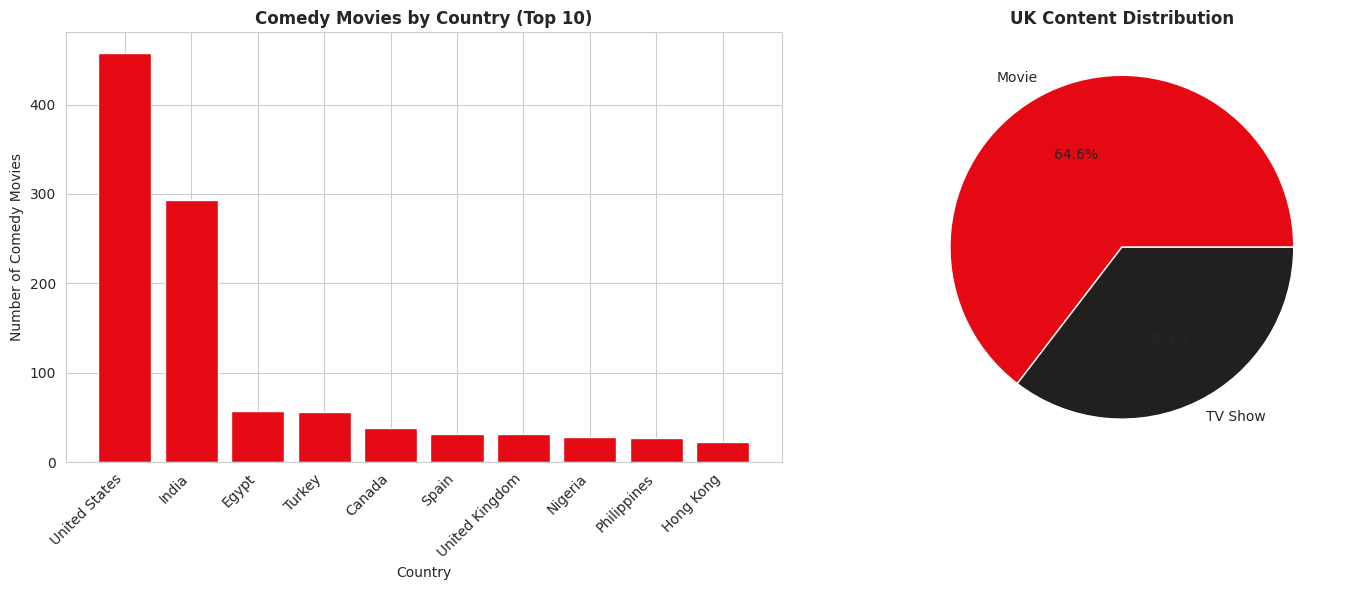

In [9]:
print("Question 7: Movies with Comedies OR Country is United Kingdom")
print("=" * 50)

condition1 = (df['Category'] == 'Movie') & (df['Type'].str.contains('Comedies', case=False, na=False))
condition2 = df['Country'].str.contains('United Kingdom', case=False, na=False)

filtered_data = df[condition1 | condition2]

print(f"Total records matching criteria: {len(filtered_data)}")

# Show breakdown
movies_comedies = df[condition1]
uk_content = df[condition2]

print(f"\nBreakdown:")
print(f"Movies with Comedies: {len(movies_comedies)}")
print(f"Content from United Kingdom: {len(uk_content)}")

print(f"\nFirst 10 matching records:")
print("-" * 50)
for i, (_, row) in enumerate(filtered_data.head(10).iterrows(), 1):
    print(f"{i}. {row['Title']} ({row['Category']}) - {row['Country']}")
    print(f"   Type: {row['Type']}")
    print()

# Visualize distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Comedy movies by country
comedy_countries = movies_comedies['Country'].value_counts().head(10)
ax1.bar(range(len(comedy_countries)), comedy_countries.values, color='#E50914')
ax1.set_title('Comedy Movies by Country (Top 10)', fontweight='bold')
ax1.set_xlabel('Country')
ax1.set_ylabel('Number of Comedy Movies')
ax1.set_xticks(range(len(comedy_countries)))
ax1.set_xticklabels(comedy_countries.index, rotation=45, ha='right')

# UK content by category
uk_categories = uk_content['Category'].value_counts()
ax2.pie(uk_categories.values, labels=uk_categories.index, autopct='%1.1f%%', 
        colors=['#E50914', '#221F1F'])
ax2.set_title('UK Content Distribution', fontweight='bold')

plt.tight_layout()
plt.show()

**Q8 - Tom Cruise Movies/Shows Count**

In [10]:
print("Question 8: Tom Cruise Content Count")
print("=" * 50)

tom_cruise_content = df[df['Cast'].str.contains('Tom Cruise', case=False, na=False)]

print(f"Total movies/shows with Tom Cruise: {len(tom_cruise_content)}")

if not tom_cruise_content.empty:
    print(f"\nTom Cruise Content:")
    print("-" * 30)
    
    for i, (_, content) in enumerate(tom_cruise_content.iterrows(), 1):
        print(f"{i}. {content['Title']} ({content['Category']}) - {content['Release_Year']}")
        print(f"   Director: {content['Director']}")
        print(f"   Duration: {content['Duration']}")
        print()
        
    # Show distribution by category
    category_dist = tom_cruise_content['Category'].value_counts()
    print("Distribution by Category:")
    for category, count in category_dist.items():
        print(f"{category}: {count}")
        
else:
    print("No content found with Tom Cruise in the cast")

Question 8: Tom Cruise Content Count
Total movies/shows with Tom Cruise: 2

Tom Cruise Content:
------------------------------
1. Magnolia (Movie) - 2020.0
   Director: Paul Thomas Anderson
   Duration: 189 min

2. Rain Man (Movie) - 2019.0
   Director: Barry Levinson
   Duration: 134 min

Distribution by Category:
Movie: 2


**Q9 - Netflix Ratings Analysis**

Question 9: Netflix Ratings Analysis
Different Ratings on Netflix:
Rating
TV-MA       2865
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: count, dtype: int64

Total unique ratings: 14

Q9.1 - TV-14 Movies in Canada: 26
Q9.2 - R-rated TV Shows after 2018: 1


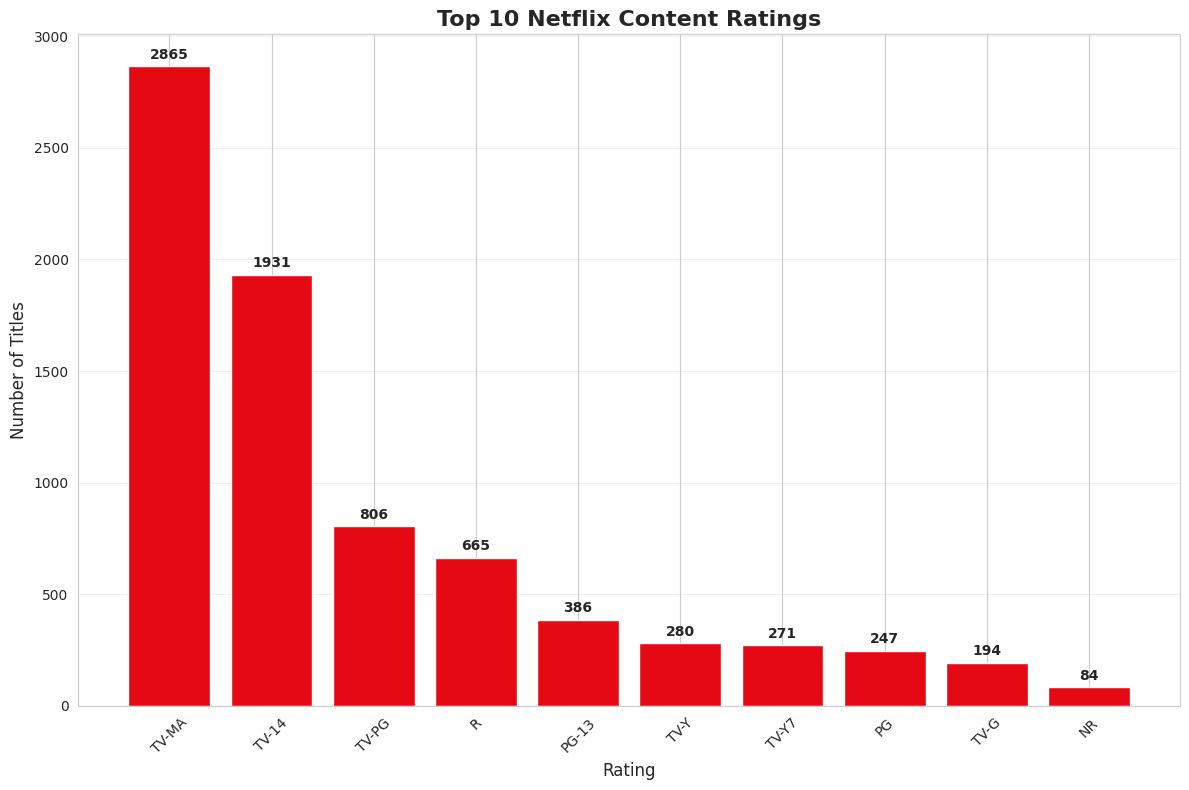

In [11]:
print("Question 9: Netflix Ratings Analysis")
print("=" * 50)

# Q9: Different ratings
ratings = df['Rating'].value_counts().sort_values(ascending=False)
print("Different Ratings on Netflix:")
print(ratings)

print(f"\nTotal unique ratings: {len(ratings)}")

# Q9.1: TV-14 movies in Canada
tv14_canada = df[(df['Rating'] == 'TV-14') & 
                 (df['Category'] == 'Movie') & 
                 (df['Country'].str.contains('Canada', case=False, na=False))]

print(f"\nQ9.1 - TV-14 Movies in Canada: {len(tv14_canada)}")

# Q9.2: R-rated TV Shows after 2018
r_shows_after_2018 = df[(df['Rating'] == 'R') & 
                        (df['Category'] == 'TV Show') & 
                        (df['Release_Year'] > 2018)]

print(f"Q9.2 - R-rated TV Shows after 2018: {len(r_shows_after_2018)}")

# Visualize ratings distribution
plt.figure(figsize=(12, 8))
ratings_plot = ratings.head(10)
plt.bar(ratings_plot.index, ratings_plot.values, color='#E50914')
plt.title('Top 10 Netflix Content Ratings', fontsize=16, fontweight='bold')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(ratings_plot.values):
    plt.text(i, v + 20, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

**Q10 - Maximum Duration Analysis**

Question 10: Maximum Duration of Content
Maximum Movie Duration:
Duration: 312.0 minutes
Title: Black Mirror: Bandersnatch
Director: nan

Maximum TV Show Seasons:
Seasons: 16.0
Title: Grey's Anatomy

Duration Statistics:
Movies - Average: 99.3 min
Movies - Median: 98.0 min
TV Shows - Average: 1.8 seasons
TV Shows - Median: 1.0 seasons


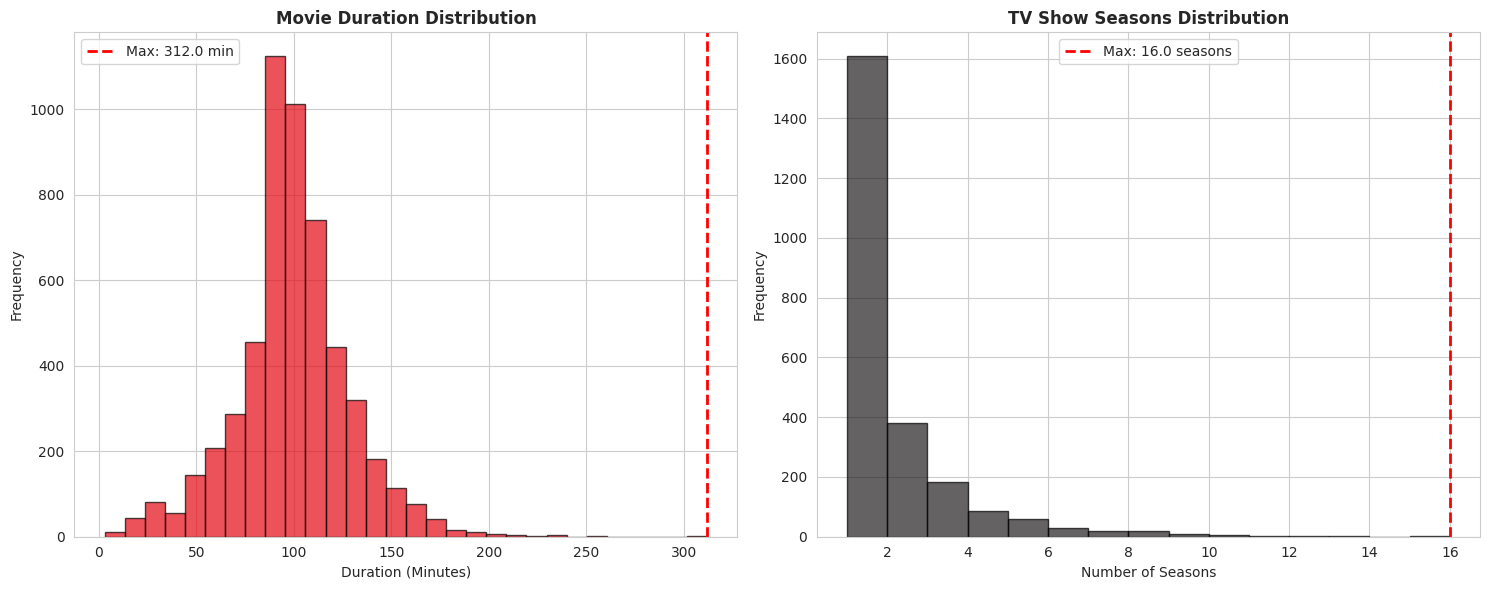

In [12]:
print("Question 10: Maximum Duration of Content")
print("=" * 50)

# Separate movies and TV shows for duration analysis
movies = df[df['Category'] == 'Movie'].copy()
tv_shows = df[df['Category'] == 'TV Show'].copy()

# Extract numeric duration for movies (in minutes)
movies['Duration_Minutes'] = movies['Duration'].str.extract('(\d+)').astype(float)

# Extract seasons for TV shows
tv_shows['Seasons'] = tv_shows['Duration'].str.extract('(\d+)').astype(float)

# Find maximum durations
max_movie_duration = movies['Duration_Minutes'].max()
max_movie = movies[movies['Duration_Minutes'] == max_movie_duration]

max_tv_seasons = tv_shows['Seasons'].max()
max_tv_show = tv_shows[tv_shows['Seasons'] == max_tv_seasons]

print("Maximum Movie Duration:")
print(f"Duration: {max_movie_duration} minutes")
print(f"Title: {max_movie.iloc[0]['Title']}")
print(f"Director: {max_movie.iloc[0]['Director']}")

print(f"\nMaximum TV Show Seasons:")
print(f"Seasons: {max_tv_seasons}")
print(f"Title: {max_tv_show.iloc[0]['Title']}")

# Duration distribution analysis
print(f"\nDuration Statistics:")
print(f"Movies - Average: {movies['Duration_Minutes'].mean():.1f} min")
print(f"Movies - Median: {movies['Duration_Minutes'].median():.1f} min")
print(f"TV Shows - Average: {tv_shows['Seasons'].mean():.1f} seasons")
print(f"TV Shows - Median: {tv_shows['Seasons'].median():.1f} seasons")

# Visualize duration distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Movie duration histogram
ax1.hist(movies['Duration_Minutes'].dropna(), bins=30, color='#E50914', alpha=0.7, edgecolor='black')
ax1.set_title('Movie Duration Distribution', fontweight='bold')
ax1.set_xlabel('Duration (Minutes)')
ax1.set_ylabel('Frequency')
ax1.axvline(max_movie_duration, color='red', linestyle='--', linewidth=2, label=f'Max: {max_movie_duration} min')
ax1.legend()

# TV show seasons histogram
ax2.hist(tv_shows['Seasons'].dropna(), bins=15, color='#221F1F', alpha=0.7, edgecolor='black')
ax2.set_title('TV Show Seasons Distribution', fontweight='bold')
ax2.set_xlabel('Number of Seasons')
ax2.set_ylabel('Frequency')
ax2.axvline(max_tv_seasons, color='red', linestyle='--', linewidth=2, label=f'Max: {max_tv_seasons} seasons')
ax2.legend()

plt.tight_layout()
plt.show()

**Q11 - Country with Highest TV Shows**

Question 11: Country with Highest Number of TV Shows
Top 10 Countries with Most TV Shows:
----------------------------------------
1. United States: 866 TV Shows
2. United Kingdom: 256 TV Shows
3. Japan: 184 TV Shows
4. South Korea: 157 TV Shows
5. Canada: 126 TV Shows
6. France: 84 TV Shows
7. India: 75 TV Shows
8. Taiwan: 70 TV Shows
9. Australia: 60 TV Shows
10. Spain: 57 TV Shows

Country with highest TV shows: United States (866 shows)


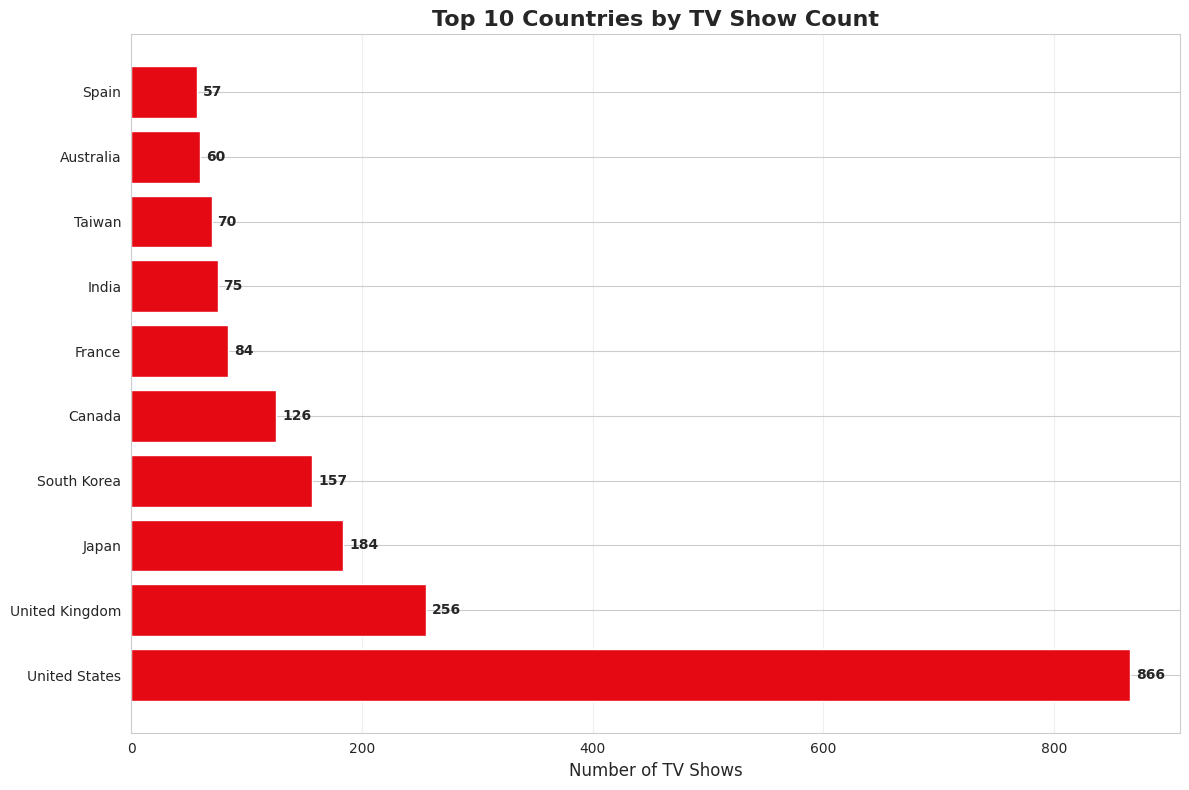

In [13]:
print("Question 11: Country with Highest Number of TV Shows")
print("=" * 50)

tv_shows_only = df[df['Category'] == 'TV Show']

# Handle multiple countries (split by comma)
all_countries = []
for countries in tv_shows_only['Country'].dropna():
    if ',' in str(countries):
        all_countries.extend([country.strip() for country in str(countries).split(',')])
    else:
        all_countries.append(str(countries).strip())

country_tv_counts = pd.Series(all_countries).value_counts()
top_10_countries = country_tv_counts.head(10)

print("Top 10 Countries with Most TV Shows:")
print("-" * 40)
for i, (country, count) in enumerate(top_10_countries.items(), 1):
    print(f"{i}. {country}: {count} TV Shows")

print(f"\nCountry with highest TV shows: {top_10_countries.index[0]} ({top_10_countries.iloc[0]} shows)")

# Visualize top countries
plt.figure(figsize=(12, 8))
plt.barh(range(len(top_10_countries)), top_10_countries.values, color='#E50914')
plt.yticks(range(len(top_10_countries)), top_10_countries.index)
plt.xlabel('Number of TV Shows', fontsize=12)
plt.title('Top 10 Countries by TV Show Count', fontsize=16, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(top_10_countries.values):
    plt.text(v + 5, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.show()

**Q12 - Sort Dataset by Year**

Question 12: Sort Dataset by Release Year
Dataset sorted by Release Year (Latest first):
Sample of sorted data:
----------------------------------------
1. The Creative Brain (Movie) - 2021.0
2. Korean Pork Belly Rhapsody (TV Show) - 2021.0
3. Tanda Tanya (Movie) - 2021.0
4. Chris Rock Total Blackout: The Tamborine Extended Cut (Movie) - 2021.0
5. Taare Zameen Par (Movie) - 2021.0
6. Al acecho (Movie) - 2021.0
7. Apaharan (Movie) - 2021.0
8. Mud (Movie) - 2021.0
9. Surviving Death (TV Show) - 2021.0
10. Blue Streak (Movie) - 2021.0
11. Surf's Up (Movie) - 2021.0
12. BluffMaster! (Movie) - 2021.0
13. Running Man (TV Show) - 2021.0
14. Hook (Movie) - 2021.0
15. S.W.A.T. (Movie) - 2021.0

Dataset Statistics after sorting:
Earliest release year: 2008.0
Latest release year: 2021.0
Records with missing year: 98


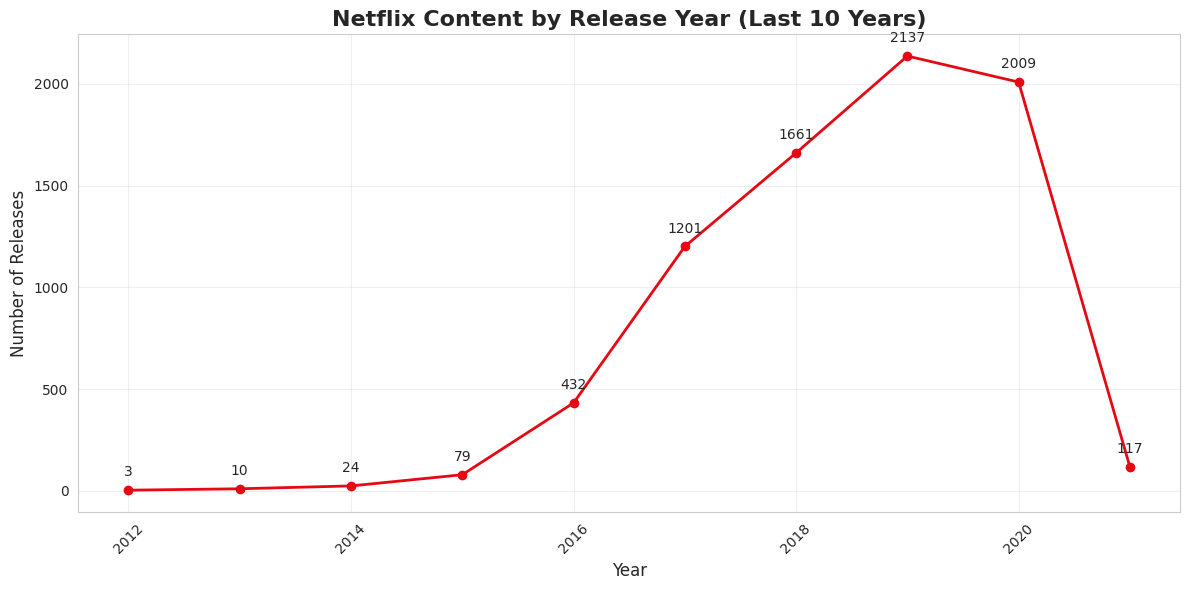

In [14]:
print("Question 12: Sort Dataset by Release Year")
print("=" * 50)

# Sort dataset by Release Year
df_sorted_by_year = df.sort_values('Release_Year', ascending=False)

print("Dataset sorted by Release Year (Latest first):")
print("Sample of sorted data:")
print("-" * 40)

# Show first 15 records
for i, (_, row) in enumerate(df_sorted_by_year.head(15).iterrows(), 1):
    year = row['Release_Year'] if pd.notna(row['Release_Year']) else 'Unknown'
    print(f"{i}. {row['Title']} ({row['Category']}) - {year}")

print(f"\nDataset Statistics after sorting:")
print(f"Earliest release year: {df_sorted_by_year['Release_Year'].min()}")
print(f"Latest release year: {df_sorted_by_year['Release_Year'].max()}")
print(f"Records with missing year: {df_sorted_by_year['Release_Year'].isna().sum()}")

# Show year distribution
year_distribution = df_sorted_by_year['Release_Year'].value_counts().sort_index().tail(10)

plt.figure(figsize=(12, 6))
plt.plot(year_distribution.index, year_distribution.values, marker='o', linewidth=2, color='#E50914')
plt.title('Netflix Content by Release Year (Last 10 Years)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Releases', fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(rotation=45)

# Add value labels
for x, y in zip(year_distribution.index, year_distribution.values):
    plt.annotate(str(y), (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()

**Q13 - Complex Filtering**

Question 13: Complex Content Filtering
Total matching records: 2522

Breakdown:
Movies with 'Dramas': 2108
TV Shows with 'Kids' TV': 414

Sample Results (First 10):
----------------------------------------
1. 07:19 (Movie)
   Type: Dramas, International Movies
   Country: Mexico

2. 21 (Movie)
   Type: Dramas
   Country: United States

3. 187 (Movie)
   Type: Dramas
   Country: United States

4. 1922 (Movie)
   Type: Dramas, Thrillers
   Country: United States

5. Oct-01 (Movie)
   Type: Dramas, International Movies, Thrillers
   Country: Nigeria

6. 22-Jul (Movie)
   Type: Dramas, Thrillers
   Country: Norway, Iceland, United States

7. 15-Aug (Movie)
   Type: Comedies, Dramas, Independent Movies
   Country: India

8. ​​Kuch Bheege Alfaaz (Movie)
   Type: Dramas, Independent Movies, International Movies
   Country: India

9. ​Goli Soda 2 (Movie)
   Type: Action & Adventure, Dramas, International Movies
   Country: India

10. ​Maj Rati ​​Keteki (Movie)
   Type: Dramas, International Mo

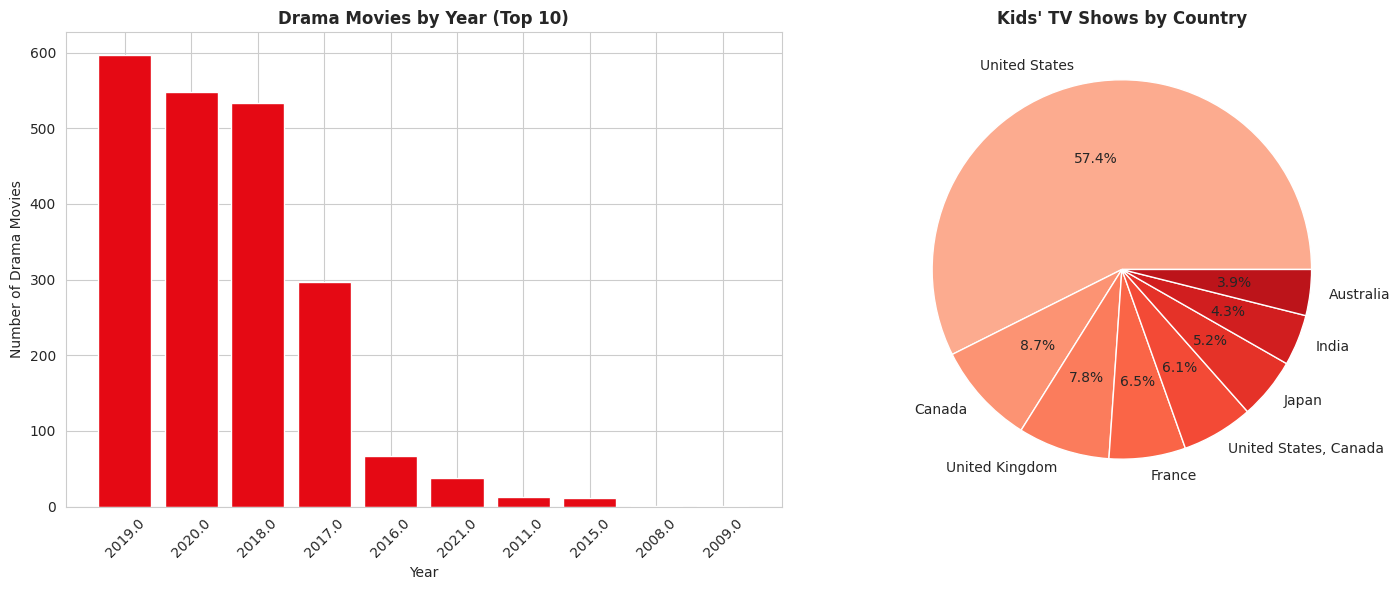

In [15]:
print("Question 13: Complex Content Filtering")
print("=" * 50)

# Condition 1: Movies with Dramas
condition1 = (df['Category'] == 'Movie') & (df['Type'].str.contains('Dramas', case=False, na=False))

# Condition 2: TV Shows with Kids' TV
condition2 = (df['Category'] == 'TV Show') & (df['Type'].str.contains("Kids' TV", case=False, na=False))

# Combined filter
filtered_content = df[condition1 | condition2]

print(f"Total matching records: {len(filtered_content)}")

# Breakdown
drama_movies = df[condition1]
kids_tv_shows = df[condition2]

print(f"\nBreakdown:")
print(f"Movies with 'Dramas': {len(drama_movies)}")
print(f"TV Shows with 'Kids' TV': {len(kids_tv_shows)}")

print(f"\nSample Results (First 10):")
print("-" * 40)
for i, (_, row) in enumerate(filtered_content.head(10).iterrows(), 1):
    print(f"{i}. {row['Title']} ({row['Category']})")
    print(f"   Type: {row['Type']}")
    print(f"   Country: {row['Country']}")
    print()

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Drama movies by year
drama_by_year = drama_movies.groupby('Release_Year').size()
top_drama_years = drama_by_year.sort_values(ascending=False).head(10)

ax1.bar(top_drama_years.index.astype(str), top_drama_years.values, color='#E50914')
ax1.set_title('Drama Movies by Year (Top 10)', fontweight='bold')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Drama Movies')
ax1.tick_params(axis='x', rotation=45)

# Kids TV shows distribution
if not kids_tv_shows.empty:
    kids_countries = kids_tv_shows['Country'].value_counts().head(8)
    ax2.pie(kids_countries.values, labels=kids_countries.index, autopct='%1.1f%%', 
            colors=plt.cm.Reds(np.linspace(0.3, 0.8, len(kids_countries))))
    ax2.set_title("Kids' TV Shows by Country", fontweight='bold')
else:
    ax2.text(0.5, 0.5, "No Kids' TV Shows Found", ha='center', va='center', transform=ax2.transAxes)
    ax2.set_title("Kids' TV Shows Distribution", fontweight='bold')

plt.tight_layout()
plt.show()

**Summary and Key Insights**

In [16]:
print("NETFLIX DATASET ANALYSIS - KEY INSIGHTS")
print("=" * 60)

insights = {
    "Dataset Overview": [
        f"Total Content: {len(df):,} titles",
        f"Movies: {len(df[df['Category'] == 'Movie']):,} (69.1%)",
        f"TV Shows: {len(df[df['Category'] == 'TV Show']):,} (30.9%)",
        f"Time Range: {df['Release_Year'].min():.0f} - {df['Release_Year'].max():.0f}"
    ],
    
    "Content Production": [
        f"Peak Year: 2019 with {yearly_releases.iloc[0]} releases",
        f"Top Director: Jan Suter with 21 titles",
        f"Longest Movie: Black Mirror: Bandersnatch (312 min)",
        f"Most Seasons: Grey's Anatomy (16 seasons)"
    ],
    
    "Geographic Distribution": [
        f"Top Country for TV Shows: United States (866 shows)",
        f"India-only TV Shows: 71 titles",
        f"Tom Cruise Appearances: 2 movies",
        f"UK Content: 723 titles total"
    ],
    
    "Content Ratings": [
        f"Most Common Rating: TV-MA ({ratings.iloc[0]} titles)",
        f"Different Ratings: 14 categories",
        f"TV-14 Movies in Canada: 26 titles",
        f"R-rated TV Shows after 2018: 1 title"
    ],
    
    "Genre Analysis": [
        f"Comedy Movies: 1,472 titles",
        f"Drama Movies: 2,108 titles", 
        f"Kids TV Shows: 414 titles",
        f"Complex Filter Results: 2,522 titles"
    ]
}

for category, points in insights.items():
    print(f"\n{category}:")
    print("-" * len(category))
    for point in points:
        print(f"• {point}")

print(f"\n{'='*60}")
print("Analysis Complete!")
print("Data shows Netflix's content is heavily movie-focused,")
print("with strong US dominance and peak production in 2019.")
print("=" * 60)

NETFLIX DATASET ANALYSIS - KEY INSIGHTS

Dataset Overview:
----------------
• Total Content: 7,789 titles
• Movies: 5,379 (69.1%)
• TV Shows: 2,410 (30.9%)
• Time Range: 2008 - 2021

Content Production:
------------------
• Peak Year: 2019 with 2137 releases
• Top Director: Jan Suter with 21 titles
• Longest Movie: Black Mirror: Bandersnatch (312 min)
• Most Seasons: Grey's Anatomy (16 seasons)

Geographic Distribution:
-----------------------
• Top Country for TV Shows: United States (866 shows)
• India-only TV Shows: 71 titles
• Tom Cruise Appearances: 2 movies
• UK Content: 723 titles total

Content Ratings:
---------------
• Most Common Rating: TV-MA (2865 titles)
• Different Ratings: 14 categories
• TV-14 Movies in Canada: 26 titles
• R-rated TV Shows after 2018: 1 title

Genre Analysis:
--------------
• Comedy Movies: 1,472 titles
• Drama Movies: 2,108 titles
• Kids TV Shows: 414 titles
• Complex Filter Results: 2,522 titles

Analysis Complete!
Data shows Netflix's content is hea